# Extract Strings from Spritesheets

In [2]:
from IPython.display import display, HTML
#Enable horizontal scrolling on output
#display(HTML("<style>pre { white-space: pre !important; }</style>"))

# Increase the width
display(HTML("<style>.container { width:80% !important; }</style>"))


In [180]:
import math
from PIL import Image, ImageColor, ImageDraw
import numpy as np
from cry_rgb import cry_to_rgb

def scale_image(img, factor):
    return img.resize((img.width * factor, img.height * factor), Image.NEAREST)

def convert_black_to_transparent(img, tolerance=20):
    # Open the image and ensure it's in RGBA mode to handle the alpha channel
    img = img.convert("RGBA")
    datas = img.getdata()

    new_data = []
    # Define the target color (black) and the replacement color (transparent)
    target_color = (tolerance, tolerance, tolerance)
    transparent_color = (0, 0, 0, 0) # R, G, B, A (0 for full transparency)

    for item in datas:
        # Check if the pixel's RGB values match the target color
        if item[0] < target_color[0] and item[1] < target_color[1] and item[2] < target_color[2]:
            new_data.append(transparent_color)
        else:
            # Keep other pixels unchanged (including their existing alpha value, if any)
            new_data.append(item)

    img.putdata(new_data)
    return img

def getPixels(file_name):
    width = 320
    cry_pixels = open(file_name,'rb').read()
    rgb_pixels = []
    for i in range(0, len(cry_pixels),2):
        t = cry_pixels[i:i+2]
        #print(i,t,int.from_bytes(t,'little'))
        rgb = cry_to_rgb(int.from_bytes(t,'big'))
        rgb_pixels += [rgb]
    pixels = np.array(rgb_pixels).astype(np.uint8)
    pixels.shape = (-1,width,3)
    return pixels

In [270]:
def print_font_string(string, font_sheet=afont_sheet, font_map=afont, size=(250,20), width=16):
    string_image = Image.new("RGBA", size, "black")
    x = 1
    for c in string:
        C = font_sheet.crop(font_map[c])
        string_image.paste(C, (x, 1))
        x+=width
    string_image = scale_image(string_image,8)
    return convert_black_to_transparent(string_image)


## Text using large font in beasty8 (aka 'bfont' or 'large demo' font)

In [288]:
bfont = {
    "A": (1,1,30,32),
    "B": (36,1,66,32),
    "C": (71,1,100,32),
    "D": (106,1,136,32),
    'E': (141, 1, 170, 32),
    'F': (176, 1, 205, 32),
    'G': (211, 1, 240, 32),
    'H': (246, 1, 275, 32),
    'I': (281, 1, 310, 32),
    'J': (1, 36, 30, 68),
    'K': (36, 36, 65, 68),
    'L': (71, 36, 100, 68),
    'M': (106, 36, 135, 68),
    'N': (141, 36, 170, 68),
    'O': (176, 36, 205, 68),
    'P': (211, 36, 240, 68),
    'Q': (246, 36, 275, 68),
    'R': (281, 36, 310, 68),
    'S': (1, 71, 30, 102),
    'T': (36, 71, 65, 102),
    'U': (71, 71, 100, 102),
    'V': (106, 71, 135, 102),
    'W': (141, 71, 170, 102),
    'X': (176, 71, 205, 102),
    'Y': (211, 71, 240, 102),
    'Z': (246, 71, 275, 102),
    "a": (1,1,30,32),
    "b": (36,1,66,32),
    "c": (71,1,100,32),
    "d": (106,1,136,32),
    'e': (141, 1, 170, 32),
    'f': (176, 1, 205, 32),
    'g': (211, 1, 240, 32),
    'h': (246, 1, 275, 32),
    'i': (281, 1, 310, 32),
    'j': (1, 36, 30, 68),
    'k': (36, 36, 65, 68),
    'l': (71, 36, 100, 68),
    'm': (106, 36, 135, 68),
    'n': (141, 36, 170, 68),
    'o': (176, 36, 205, 68),
    'p': (211, 36, 240, 68),
    'q': (246, 36, 275, 68),
    'r': (281, 36, 310, 68),
    's': (1, 71, 30, 102),
    't': (36, 71, 65, 102),
    'u': (71, 71, 100, 102),
    'v': (106, 71, 135, 102),
    'w': (141, 71, 170, 102),
    'x': (176, 71, 205, 102),
    'y': (211, 71, 240, 102),
    'z': (246, 71, 275, 102),
    ' ': (281, 71, 310, 102),
    '0': (1, 106, 30, 138),
    '1': (36, 106, 65, 138),
    '2': (71, 106, 100, 138),
    '3': (106, 106, 135, 138),
    '4': (141, 106, 170, 138),
    '5': (176, 106, 205, 138),
    '6': (211, 106, 240, 138),
    '7': (246, 106, 275, 138),
    '8': (281, 106, 310, 138),
    '9': (1, 141, 30, 173),
    '.': (36, 141, 65, 173),
    '!': (71, 141, 100, 173),
    '-': (106, 141, 135, 173)
}

In [208]:
pixels = getPixels('cry/beasty8.cry')
subpixels = pixels
bfont_sheet = Image.fromarray(subpixels,mode='RGB')

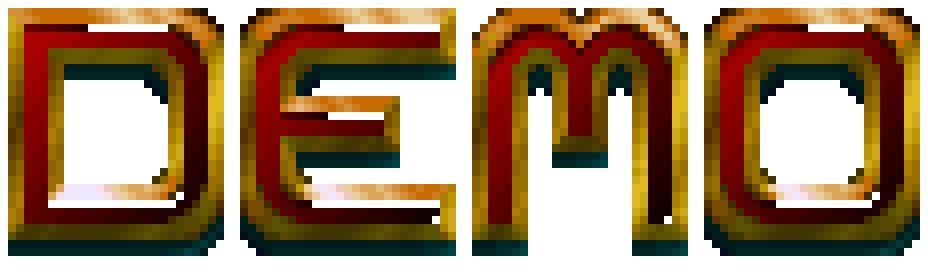

In [289]:
width = 29
height = 35
string = "DEMO"
img = print_font_string(string, font_sheet=bfont_sheet, font_map=bfont, size=(len(string)*width, height), width=width)
img.save(f"t2k_strings/{string.replace(" ","_")}.png")
img

In [290]:
def write_bfont_string(string):
    width = 29
    height=35
    img = print_font_string(string, font_sheet=bfont_sheet, font_map=bfont, size=(len(string)*width,height), width=width)
    img.save(f"t2k_strings/{string.replace(" ","_")}.png")
    return img

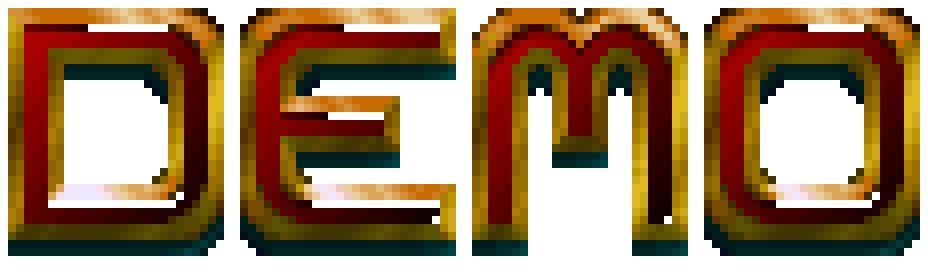

In [292]:
write_bfont_string("DEMO")

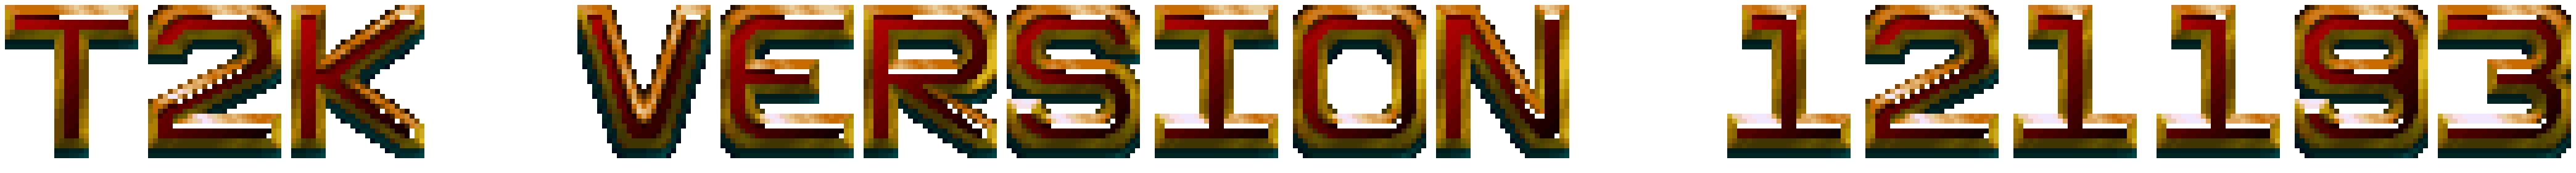

In [291]:
write_bfont_string("t2k version 121193")

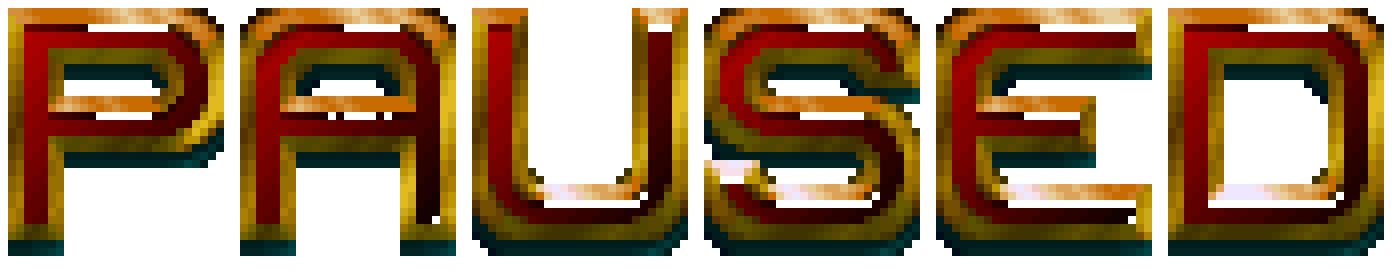

In [343]:
write_bfont_string("paused")

## Text using small font in beasty3 (aka 'cfont' or small font)

In [361]:
cfont = {
 'A': (27, 181, 35, 189),
 'B': (38, 181, 46, 189),
 'C': (49, 181, 57, 189),
 'D': (60, 181, 68, 189),
 'E': (71, 181, 79, 189),
 'F': (82, 181, 90, 189),
 'G': (93, 181, 101, 189),
 'H': (104, 181, 112, 189),
 'I': (115, 181, 123, 189),
 'J': (126, 181, 134, 189),
 'K': (137, 181, 171, 189),
 'L': (148, 181, 156, 189),
 'M': (159, 181, 167, 189),
 'N': (170, 181, 178, 189),
 'O': (181, 181, 189, 189),
 'P': (192, 181, 200, 189),
 'Q': (203, 181, 211, 189),
 'R': (214, 181, 222, 189),
 'S': (225, 181, 233, 189),
 'T': (236, 181, 244, 189),
 'U': (247, 181, 255, 189),
 'V': (258, 181, 266, 189),
 'W': (269, 181, 277, 189),
 'X': (280, 181, 288, 189),
 'Y': (291, 181, 299, 189),
 'Z': (302, 181, 310, 189),
 ' ': (313, 181, 321, 189),
 'a': (27, 191, 35, 199),
 'b': (38, 191, 46, 199),
 'c': (49, 191, 57, 199),
 'd': (60, 191, 68, 199),
 'e': (71, 191, 79, 199),
 'f': (82, 191, 90, 199),
 'g': (93, 191, 101, 199),
 'h': (104, 191, 112, 199),
 'i': (115, 191, 123, 199),
 'j': (126, 191, 134, 199),
 'k': (137, 191, 171, 199),
 'l': (148, 191, 156, 199),
 'm': (159, 191, 167, 199),
 'n': (170, 191, 178, 199),
 'o': (181, 191, 189, 199),
 'p': (192, 191, 200, 199),
 'q': (203, 191, 211, 199),
 'r': (214, 191, 222, 199),
 's': (225, 191, 233, 199),
 't': (236, 191, 244, 199),
 'u': (247, 191, 255, 199),
 'v': (258, 191, 266, 199),
 'w': (269, 191, 277, 199),
 'x': (280, 191, 288, 199),
 'y': (291, 191, 299, 199),
 'z': (302, 191, 310, 199),
 '0': (27, 169, 35, 177),
 '1': (38, 169, 46, 177),
 '2': (49, 169, 57, 177),
 '3': (60, 169, 68, 177),
 '4': (71, 169, 79, 177),
 '5': (82, 169, 90, 177),
 '6': (93, 169, 101, 177),
 '7': (104, 169, 112, 177),
 '8': (115, 169, 123, 177),
 '9': (126, 169, 134, 177),
 '.': (27, 158, 35, 166),
 '!': (38, 158, 46, 166),
 ':': (49, 158, 57, 166),
 ',': (60, 158, 68, 166),
 '': (71, 158, 79, 166),
 '(': (82, 158, 90, 166),
 ')': (93, 158, 101, 166),
 '-': (104, 158, 112, 166),
}

In [326]:
subpixels = getPixels('cry/beasty3.cry')
cfont_sheet = Image.fromarray(subpixels,mode='RGB')

In [334]:
def write_cfont_string(string):
    width = 9
    height=12
    img = print_font_string(string, font_sheet=cfont_sheet, font_map=cfont, size=(len(string)*width,height), width=width)
    img.save(f"t2k_strings/{string.replace(" ","_")}.png")
    return img

In [342]:
0xa4

164

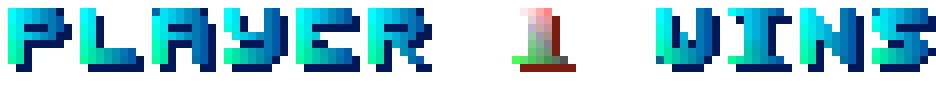

In [350]:
write_cfont_string("player 1 wins")

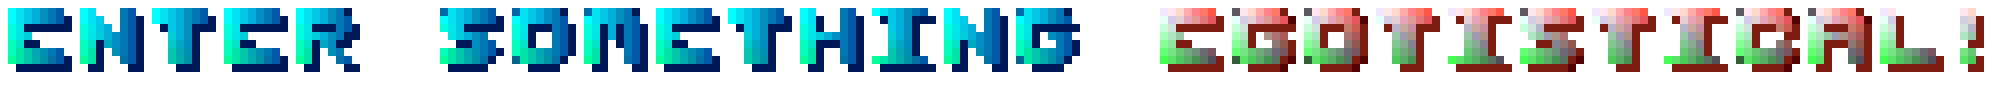

In [362]:
write_cfont_string("enter something EGOTISTICAL!")

## Text using small font in beasty4 (aka 'afont' or 'Atari' font)

In [311]:
afont = {
 '0': (0, 145, 15, 163),
 '1': (16, 145, 31, 163),
 '2': (32, 145, 47, 163),
 '3': (48, 145, 63, 163),
 '4': (64, 145, 79, 163),
 '5': (80, 145, 95, 163),
 '6': (96, 145, 111, 163),
 '7': (112, 145, 127, 163),
 '8': (128, 145, 143, 163),
 '9': (144, 145, 159, 163),
 '(': (164, 145, 179, 163),
 ')': (188, 145, 203, 163),
 ' ': (202, 145, 217, 163),
 'A': (1, 164, 16, 182),
 'a': (1, 164, 16, 182),
 'B': (20, 164, 35, 182),
 'b': (20, 164, 35, 182),
 'C': (39, 164, 54, 182),
 'c': (39, 164, 54, 182),
 'D': (58, 164, 73, 182),
 'd': (58, 164, 73, 182),
 'E': (77, 164, 92, 182),
 'e': (77, 164, 92, 182),
 'F': (96, 164, 111, 182),
 'f': (96, 164, 111, 182),
 'G': (115, 164, 130, 182),
 'g': (115, 164, 130, 182),
 'H': (134, 164, 149, 182),
 'h': (134, 164, 149, 182),
 'I': (153, 164, 168, 182),
 'i': (153, 164, 168, 182),
 'J': (172, 164, 187, 182),
 'j': (172, 164, 187, 182),
 'K': (191, 164, 206, 182),
 'k': (191, 164, 206, 182),
 'L': (210, 164, 225, 182),
 'l': (210, 164, 225, 182),
 'M': (229, 164, 244, 182),
 'm': (229, 164, 244, 182),
 'N': (248, 164, 263, 182),
 'n': (248, 164, 263, 182),
 'O': (267, 164, 282, 182),
 'o': (267, 164, 282, 182),
 'P': (286, 164, 301, 182),
 'p': (286, 164, 301, 182),
 'Q': (1, 182, 16, 200),
 'q': (1, 182, 16, 200),
 'R': (20, 182, 35, 200),
 'r': (20, 182, 35, 200),
 'S': (39, 182, 54, 200),
 's': (39, 182, 54, 200),
 'T': (58, 182, 73, 200),
 't': (58, 182, 73, 200),
 'U': (77, 182, 92, 200),
 'u': (77, 182, 92, 200),
 'V': (96, 182, 111, 200),
 'v': (96, 182, 111, 200),
 'W': (115, 182, 130, 200),
 'w': (115, 182, 130, 200),
 'X': (134, 182, 149, 200),
 'x': (134, 182, 149, 200),
 'Y': (153, 182, 168, 200),
 'y': (153, 182, 168, 200),
 'Z': (172, 182, 187, 200),
 'z': (172, 182, 187, 200),
 '.': (191, 182, 206, 200),
 '!': (210, 182, 225, 200),
 ':': (229, 182, 244, 200),
 ',': (248, 182, 263, 200),
 '-': (267, 182, 282, 200)
}

In [183]:
pixels = getPixels('cry/beasty4.cry')
subpixels = pixels
afont_sheet = Image.fromarray(subpixels,mode='RGB')

In [276]:
def write_afont_string(string):
    width = 16
    img = print_font_string(string, font_sheet=afont_sheet, font_map=afont, size=(len(string)*width,20), width=width)
    img.save(f"t2k_strings/{string.replace(" ","_")}.png")
    return img

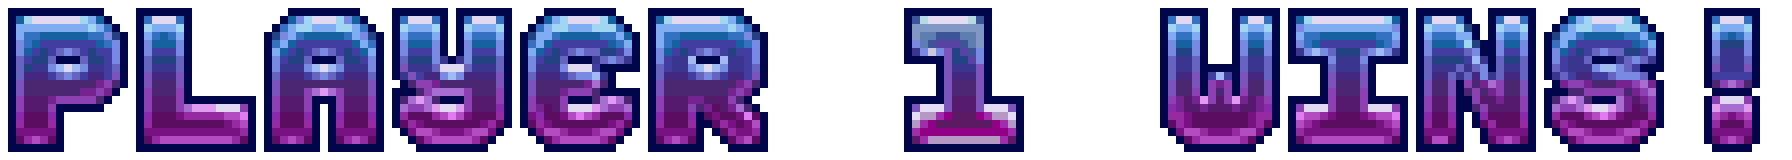

In [278]:
write_afont_string("player 1 wins!")

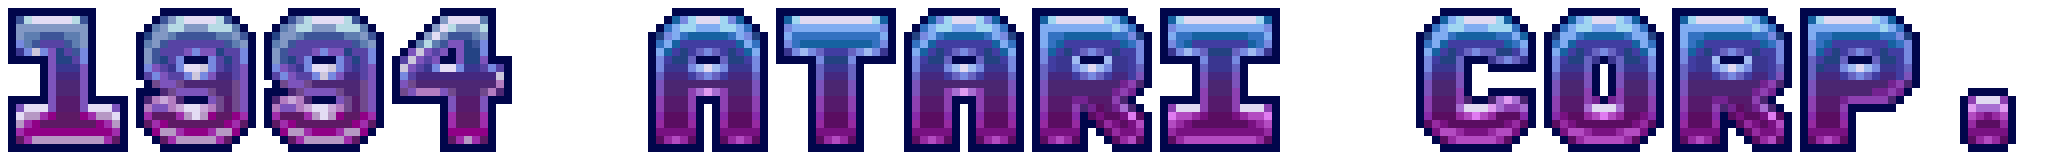

In [315]:
write_afont_string("copyright 1981,")
write_afont_string("1994 Atari Corp.")

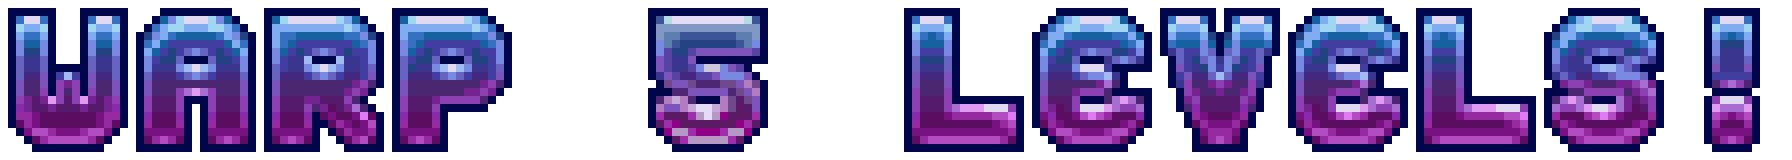

In [282]:
write_afont_string("Warp 5 Levels!")

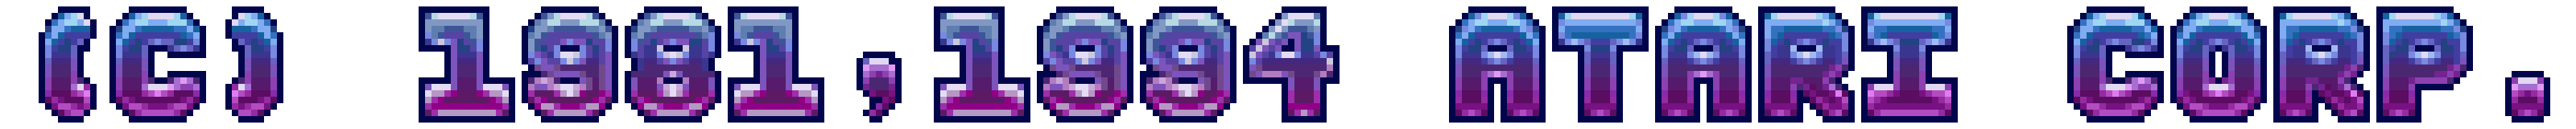

In [312]:
write_afont_string("(C) 1981,1994 ATARI CORP.")

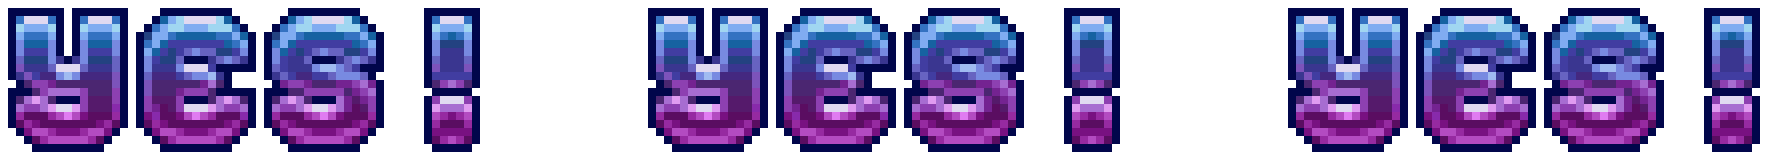

In [363]:
write_afont_string("yes! yes! yes!")

# Rough Work

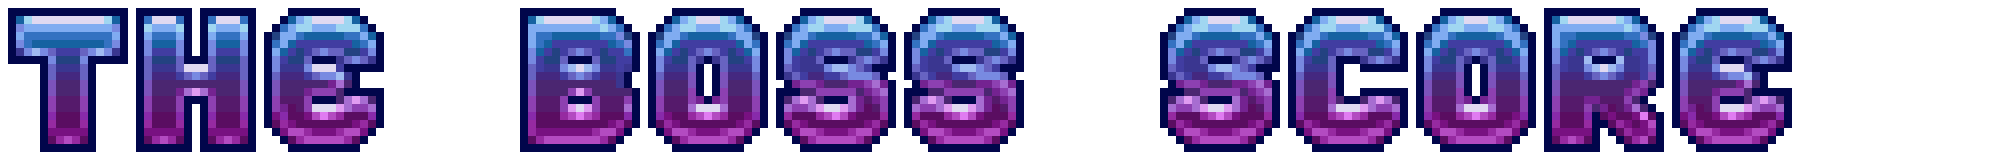

In [142]:
demo_message = Image.new("RGBA", (250,20), "black")
string = "the boss score"
x = 1
for c in string:
    C = font_sheet4.crop(font4[c])
    demo_message.paste(C, (x, 1))
    x+=16
demo_message = demo_message.resize((demo_message.width * 8, demo_message.height * 8), Image.NEAREST)
#demo_message.save("t2kdemo/pressfiretoplay.png")
#convert_black_to_transparent(demo_message).save("t2kdemo/pressfiretoplay.png")
convert_black_to_transparent(demo_message)



In [ ]:
def scale_image(img, factor):
    return img.resize((img.width * factor, img.height * factor), Image.NEAREST)

tst_img = font_sheet4.crop(font4["-"])
scale_image(tst_img,20)

In [118]:
test_font = {}
w = 15
x = 0
y = 145
h = 163
xo = 16
for c in "0123456789()":
    test_font[c] = (x,y,x+w,h)
    x += xo

w = 15
x = 1
y = 164
h = 182
xo = 19
for c in "ABCDEFGHIJKLMNOP":
    test_font[c] = (x,y,x+w,h)
    x += xo
test_font

w = 15
x = 1
y = 182
h = 200
xo = 19
for c in "QRSTUVWXYZ.!:,-":
    test_font[c] = (x,y,x+w,h)
    x += xo
test_font

#(164,"ABCDEFGHIJKLMNOP"),("QRSTUVWXYZ.!:,-")]:
    

{'0': (0, 145, 15, 163),
 '1': (16, 145, 31, 163),
 '2': (32, 145, 47, 163),
 '3': (48, 145, 63, 163),
 '4': (64, 145, 79, 163),
 '5': (80, 145, 95, 163),
 '6': (96, 145, 111, 163),
 '7': (112, 145, 127, 163),
 '8': (128, 145, 143, 163),
 '9': (144, 145, 159, 163),
 '(': (160, 145, 175, 163),
 ')': (176, 145, 191, 163),
 'A': (1, 164, 16, 182),
 'B': (20, 164, 35, 182),
 'C': (39, 164, 54, 182),
 'D': (58, 164, 73, 182),
 'E': (77, 164, 92, 182),
 'F': (96, 164, 111, 182),
 'G': (115, 164, 130, 182),
 'H': (134, 164, 149, 182),
 'I': (153, 164, 168, 182),
 'J': (172, 164, 187, 182),
 'K': (191, 164, 206, 182),
 'L': (210, 164, 225, 182),
 'M': (229, 164, 244, 182),
 'N': (248, 164, 263, 182),
 'O': (267, 164, 282, 182),
 'P': (286, 164, 301, 182),
 'Q': (1, 182, 16, 200),
 'R': (20, 182, 35, 200),
 'S': (39, 182, 54, 200),
 'T': (58, 182, 73, 200),
 'U': (77, 182, 92, 200),
 'V': (96, 182, 111, 200),
 'W': (115, 182, 130, 200),
 'X': (134, 182, 149, 200),
 'Y': (153, 182, 168, 200),
 '

In [135]:
test_font = {}
w = 15
x = 0
y = 145
h = 163
xo = 16
for c in "0123456789() ":
    test_font[c] = (x,y,x+w,h)
    x += xo

w = 15
x = 1
y = 164
h = 182
xo = 19
for c in "ABCDEFGHIJKLMNOP":
    test_font[c] = (x,y,x+w,h)
    test_font[c.lower()] = (x,y,x+w,h)
    x += xo
test_font

w = 15
x = 1
y = 182
h = 200
xo = 19
for c in "QRSTUVWXYZ.!:,-":
    test_font[c] = (x,y,x+w,h)
    test_font[c.lower()] = (x,y,x+w,h)
    x += xo
test_font

#(164,"ABCDEFGHIJKLMNOP"),("QRSTUVWXYZ.!:,-")]:
    

{'0': (0, 145, 15, 163),
 '1': (16, 145, 31, 163),
 '2': (32, 145, 47, 163),
 '3': (48, 145, 63, 163),
 '4': (64, 145, 79, 163),
 '5': (80, 145, 95, 163),
 '6': (96, 145, 111, 163),
 '7': (112, 145, 127, 163),
 '8': (128, 145, 143, 163),
 '9': (144, 145, 159, 163),
 '(': (160, 145, 175, 163),
 ')': (176, 145, 191, 163),
 ' ': (192, 145, 207, 163),
 'A': (1, 164, 16, 182),
 'a': (1, 164, 16, 182),
 'B': (20, 164, 35, 182),
 'b': (20, 164, 35, 182),
 'C': (39, 164, 54, 182),
 'c': (39, 164, 54, 182),
 'D': (58, 164, 73, 182),
 'd': (58, 164, 73, 182),
 'E': (77, 164, 92, 182),
 'e': (77, 164, 92, 182),
 'F': (96, 164, 111, 182),
 'f': (96, 164, 111, 182),
 'G': (115, 164, 130, 182),
 'g': (115, 164, 130, 182),
 'H': (134, 164, 149, 182),
 'h': (134, 164, 149, 182),
 'I': (153, 164, 168, 182),
 'i': (153, 164, 168, 182),
 'J': (172, 164, 187, 182),
 'j': (172, 164, 187, 182),
 'K': (191, 164, 206, 182),
 'k': (191, 164, 206, 182),
 'L': (210, 164, 225, 182),
 'l': (210, 164, 225, 182),
 '

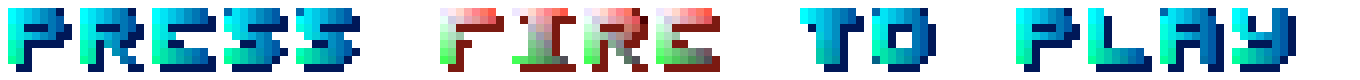

In [9]:
demo_message = Image.new("RGBA", (170,10), "black")
string = "press FIRE to play"
x = 1
for c in string:
    C = font_sheet3.crop(font3[c])
    demo_message.paste(C, (x, 1))
    x+=9
demo_message = demo_message.resize((demo_message.width * 8, demo_message.height * 8), Image.NEAREST)
#demo_message.save("t2kdemo/pressfiretoplay.png")
#convert_black_to_transparent(demo_message).save("t2kdemo/pressfiretoplay.png")
convert_black_to_transparent(demo_message)